# Aidan Tata-Lobo
# 10/17/2023
# Data Science Programming
## Project 1: Plotting the Study Questions

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
datafile = "Homework new.csv"
df = pd.read_csv(datafile)

In [54]:
gender_counts = df['gender'].value_counts()
race_counts = df['race/ethnicity'].value_counts()
degree_counts = df['degree'].value_counts()

In [55]:
gender_counts.info

<bound method Series.info of Man                  348
Woman                 78
Prefer not to say     10
Non-binary             9
I do not identify      3
Name: gender, dtype: int64>

In [56]:
man_counts = gender_counts[['Man']]
man_counts.info

<bound method Series.info of Man    348
Name: gender, dtype: int64>

In [57]:
race_counts.info

<bound method Series.info of White/Caucasian                                  198
Hispanic or Latino                                81
Multi-Racial                                      63
Asian                                             62
Choose not to reply                               25
Black/African American                            16
American Indian/Native American/Alaska Native      3
Name: race/ethnicity, dtype: int64>

In [58]:
df['degree'] = df['degree'].str.strip()

In [59]:
degree_counts.info

<bound method Series.info of computer science                                   150
information technology                             105
engineering                                         39
cybersecurity                                       27
undecided                                           20
cis game development option                         19
non degree seeking                                  11
business                                             9
information security certificate of achievement      8
data science                                         7
digital media technology                             7
engineering                                          6
challenger program                                   6
business                                             5
liberal arts                                         4
highschool                                           4
technical studies                                    4
web development certificate of achie

### What is the gender ratio of all the students in each major?

In [60]:
test = df.groupby(['degree','gender']).gender.count().unstack(fill_value=0)

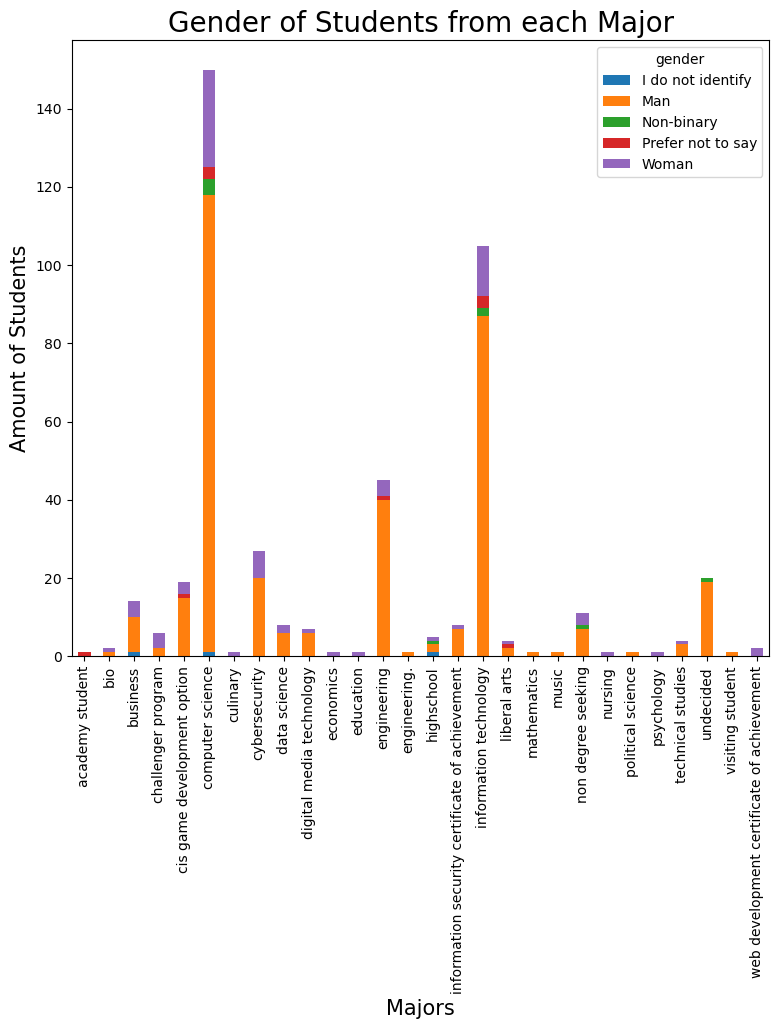

In [61]:
test.plot(kind='bar', stacked=True, figsize=(9, 8))
plt.ylabel('Amount of Students', fontsize=15)
plt.xlabel('Majors', fontsize=15)
plt.title('Gender of Students from each Major', fontsize=20)
plt.show()

### Which of the classes has the least interest for people who were declared as non-majors?

In [62]:
df.rename(columns= ({'on_a_scale_of_1_to_5,_with_1_being_not_at_all_interested_and_5_being_extremely_interested,_how_interested_are_you_in_taking_more_computing_classes?':'scale'}), 
          inplace=True)

In [63]:
filtered_data = df.loc[((df['degree'] == 'undecided') & (df['scale'] <= 4.0))]

In [64]:
question2_value_counts = filtered_data['course'].value_counts()

([<matplotlib.patches.Wedge at 0x1b94e2f5e10>,
 [Text(-0.24477311341532165, -1.0724206837565984, 'CMP128'),
  Text(0.2447731887207745, 1.0724206665686111, 'FILL IN')],
 [Text(-0.13351260731744816, -0.5849567365945082, '92.9%'),
  Text(0.13351264839314972, 0.5849567272192424, '7.1%')])

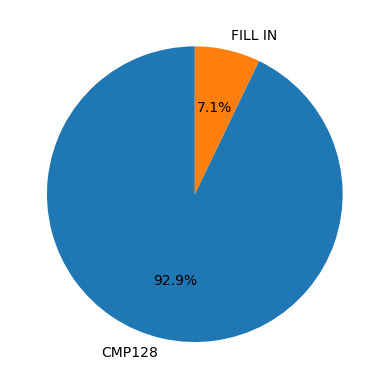

In [65]:
plt.pie(question2_value_counts, labels = ['CMP128', 'FILL IN'], autopct='%1.1f%%', startangle=90)

### 5. Which demographic was least likely to enroll in each major?

In [66]:
df.rename(columns= ({ 'to_what_extent_did_the_following_impact_your_decision_to_attend_county_college_of_morris?_[affordable_cost]':'prior_cost',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[open_house]':'prior_openhouse',
                    'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[instant_decision_day]':'prior_instantdecision',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[on-campus_information_session]':'prior_on_campus',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[titans_tuesday_(virtual)_information_session]':'prior_virtual_session',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[women_who_dare]':'prior_women_who_dare',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[regional_college_fair]':'prior_college_fair',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[hs_sharetime_information_session]':'prior_sharetime',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[challenger_program]':'prior_challenger',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[cybersecurity_information_protection_program_participation_]':'prior_cyber',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[information_session_at_my_high_school]':'prior_info_session_highschool',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[campus_visit_with_my_high_school]':'prior_highschool_campus_visit',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[campus_visit_(individual)]':'prior_campus_visit',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[workforce_development_class]':'prior_workforce_class',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[corporate_training]':'prior_corporate_training',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[teen_arts_festival]':'prior_teen_arts',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[summer_camp_at_ccm]':'prior_summer_camp',
                     'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all?_[hour_of_code]':'prior_hour_code',
                    }), 
          inplace=True)


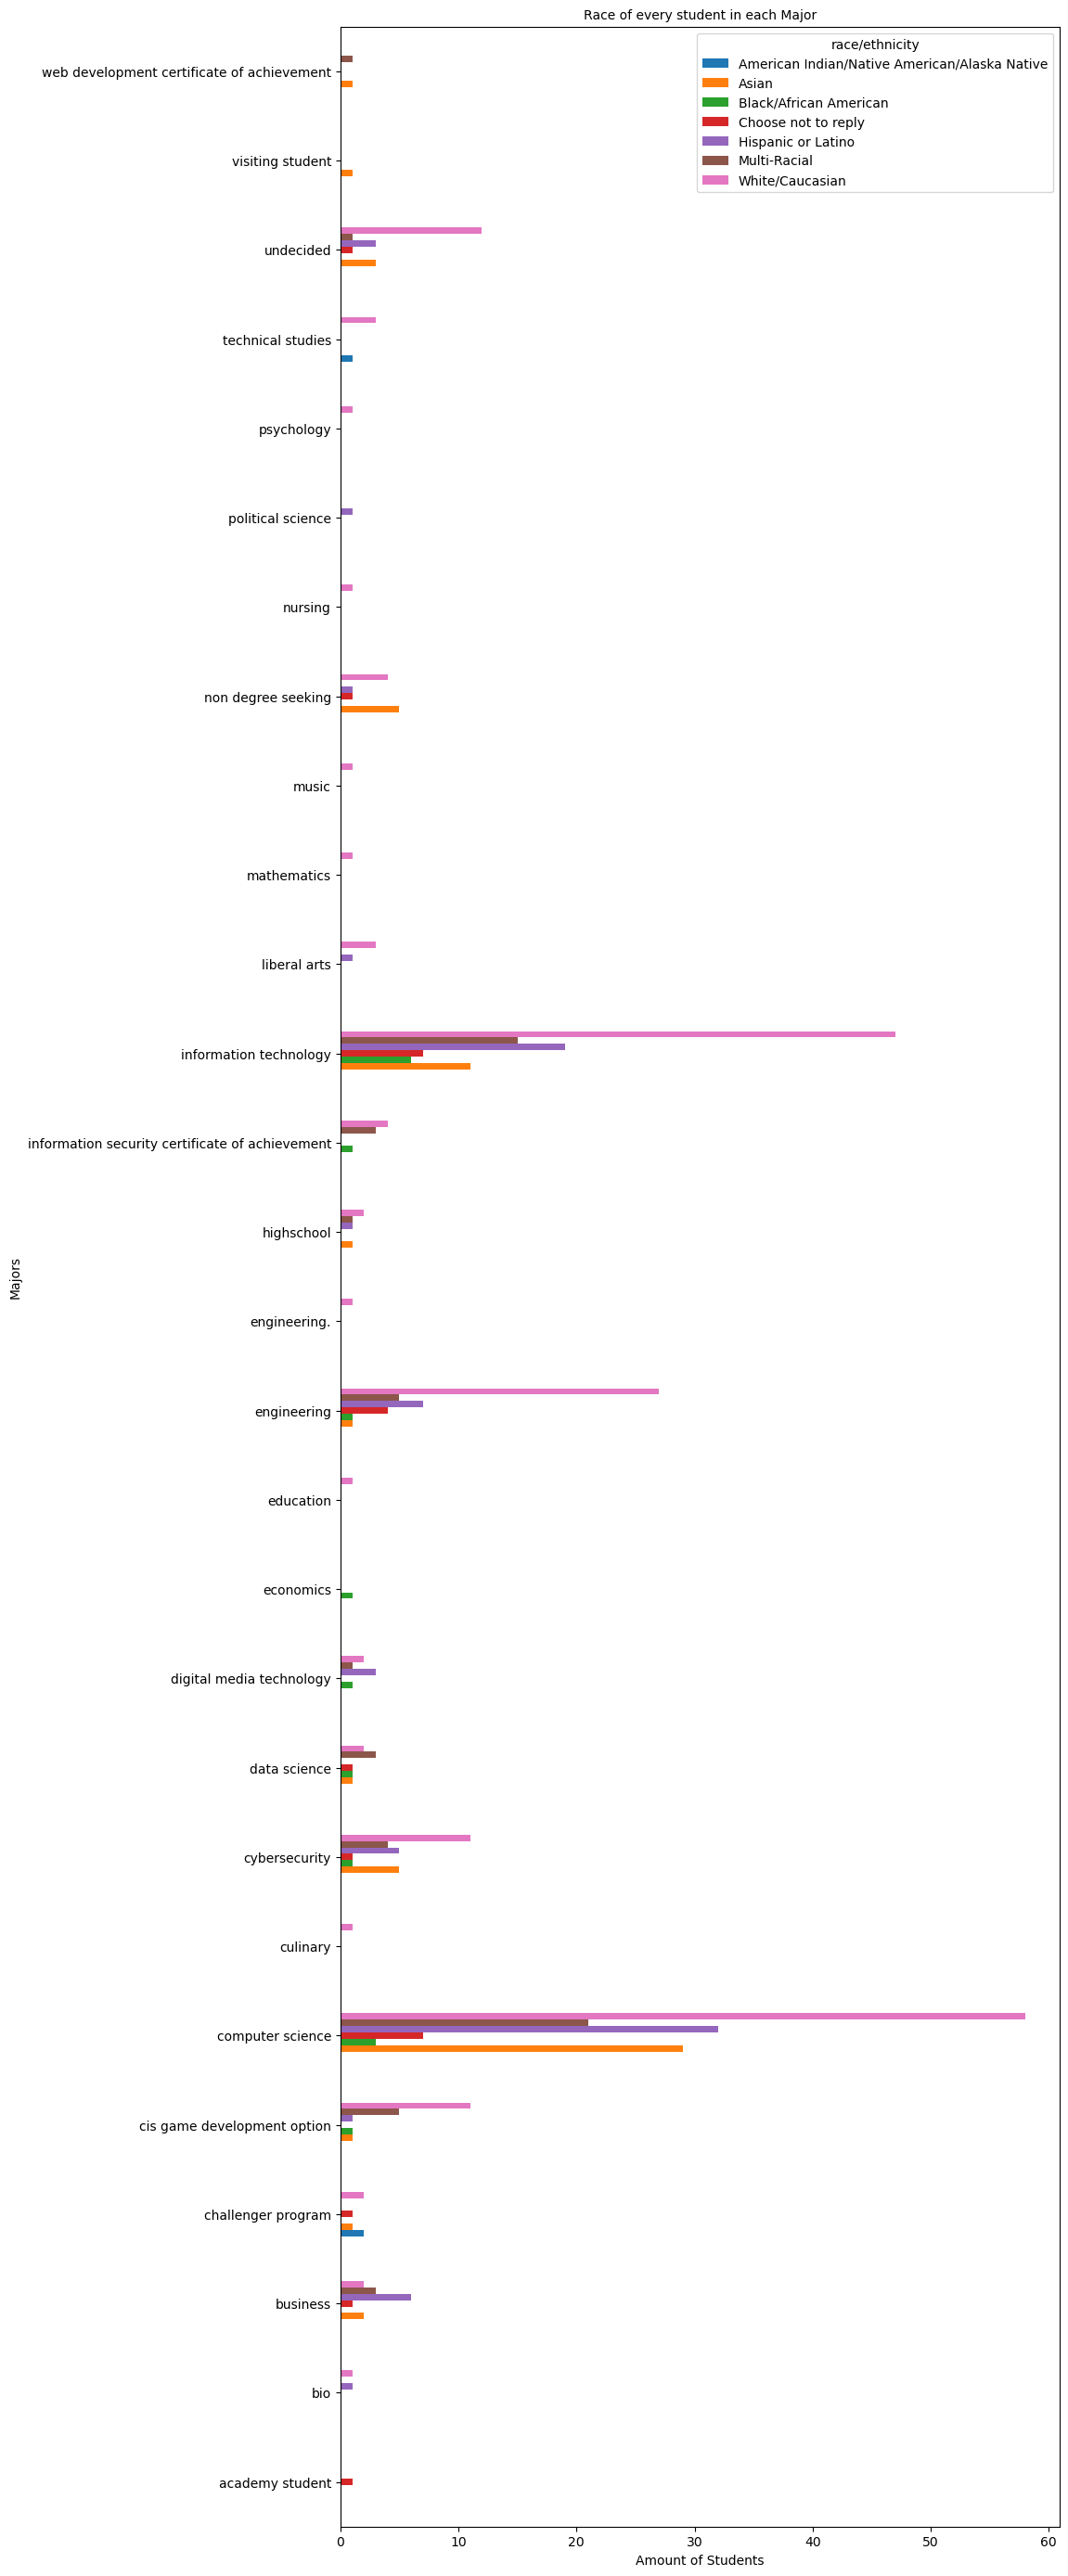

In [67]:
tear = df.groupby(['degree','race/ethnicity']).gender.count().unstack(fill_value=0)

tear.plot(kind='barh', stacked=False, figsize=(10, 35))
plt.ylabel('Majors', fontsize=10)
plt.xlabel('Amount of Students', fontsize=10)
plt.title('Race of every student in each Major', fontsize=10)
plt.show()

### 2. What were the least and most popular events students went to prior to applying to colleges?

In [68]:
df.loc[:, 'prior_openhouse':'prior_on_campus']

,prior_openhouse,prior_instantdecision,prior_on_campus
0,Yes,No,Yes
1,No,No,No
2,Yes,No,Yes
3,No,No,No
4,Yes,Yes,Yes
5,No,No,No
6,Yes,No,Yes
7,No,No,No
8,No,No,No
9,Yes,No,No


In [69]:
openhouse_counts = df['prior_openhouse'].value_counts().reset_index()
campus_counts = df['prior_on_campus'].value_counts().reset_index()
instant_decision = df['prior_instantdecision'].value_counts().reset_index()
campus_counts

,index,prior_on_campus
0,No,315
1,Yes,116
2,Not Sure,17


In [70]:
instant_decision

,index,prior_instantdecision
0,No,398
1,Yes,30
2,Not Sure,20


In [71]:
df_counts = pd.concat([openhouse_counts, campus_counts['prior_on_campus'], instant_decision['prior_instantdecision']],axis=1)
df_counts

,index,prior_openhouse,prior_on_campus,prior_instantdecision
0,No,320,315,398
1,Yes,108,116,30
2,Not Sure,20,17,20


In [72]:
openhouse_counts.loc[openhouse_counts['index'] == "Yes"].index[0]


1

In [73]:
newdf=pd.DataFrame({'cols': df_counts.columns[1:], 'yes':df_counts.iloc[1,1:]})
newdf

,cols,yes
prior_openhouse,prior_openhouse,108
prior_on_campus,prior_on_campus,116
prior_instantdecision,prior_instantdecision,30


<BarContainer object of 3 artists>

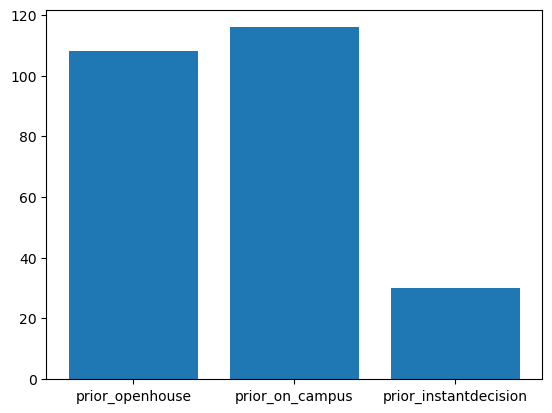

In [74]:
plt.bar(newdf.cols, newdf.yes)